# Study of the powerlaw exponent as a function of 8 micron intensity


In [1]:
import numpy as np
import astropy.io.fits as pyfits
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.optimize import curve_fit

import support_functions as sup

In [2]:
#### User input ####

## information to fetch the necessary data
dir_path = "../data_CIIcorr/data_FEEDBACK/" ## path to the data directory
name_CII = "_CII_final_res20_grid8_0p5_clean_integrated" ## identifier of the [CII] data file
name_8m = "_Spitzer_IRAC_8_20_8" ## identifier of the 8 micron data file
plot_path = "../plots_CIIcorr/CII_correlations/"

list_regions = [ ## list of the regions to be studied
    #"CYGNUSX",
    "M16",
    "M17",
    "NGC7538",
    "RCW36",
    "RCW49",
    "RCW79",
    "RCW120",
    "W40",
    #"ORIONA"
]

## minimal intensity for the [CII] data
min_cut_CII = 20.

## number of datapoints to be considered to fit a powerlaw exponent
num_data_points = 1000. #[500, 1000]

## minimum number of data points needed in the final interval to perform a fit
min_points_final = 50

####################

In [3]:
## Study the powerlaws for each region
pl_vals = [[] for region in list_regions]
offset_vals = [[] for region in list_regions]
av8m_vals = [[] for region in list_regions]

## loop over the regions
for idx, region in enumerate(list_regions):
    print("Analyzing {reg}".format(reg = region))
    
    ## read the data into a Pandas DataFrame
    df = sup.read_data_to_DF(
        "{path}{region}/{region}{CII}.fits".format(path = dir_path, region = region, CII = name_CII),
        "{path}{region}/{region}{name}.fits".format(path = dir_path, region = region, name = name_8m),
        min_cut_CII,
        region
    )
    
    ## sort the DataFrame
    df = df.sort_values(by = ["8 micron"])
    
    ## loop over the different subsamples that will be fitted with a powerlaw
    num_groups = int(len(df.index)/num_data_points) + 1
    for i in range(0, num_groups):
        ## define the begin and end
        beg = int(i*num_data_points)
        end = int((i+1)*num_data_points)
        
        ## extract the sub sample
        sub_df = df.iloc[beg:end]
        
        ## fit the sub_sample
        popt, pcov = curve_fit(sup.lin_func, sub_df['8 micron'], sub_df['CII'])
        
        ## store the fitting results (and)
        pl_vals[idx].append(popt[0])
        offset_vals[idx].append(popt[1])
        av8m_vals[idx].append(np.nanmean(sub_df['8 micron']))
        
        # STILL STORE THE ERRORS OR STDS + THE OFFSETS SUGGEST SOMETHING IS WRONG

Analyzing M16
Analyzing M17
Analyzing NGC7538
Analyzing RCW36
Analyzing RCW49
Analyzing RCW79
Analyzing RCW120
Analyzing W40


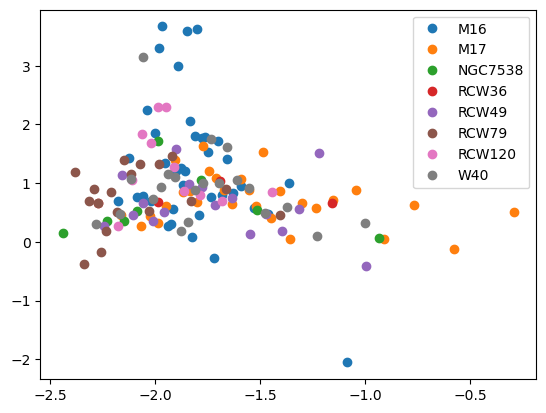

In [4]:
## plot the powerlaw exponent results
for pls, offs, av8s, region in zip(pl_vals, offset_vals, av8m_vals, list_regions):
    plt.plot(av8s, pls, "o", label = region)

plt.legend()
plt.show()
    

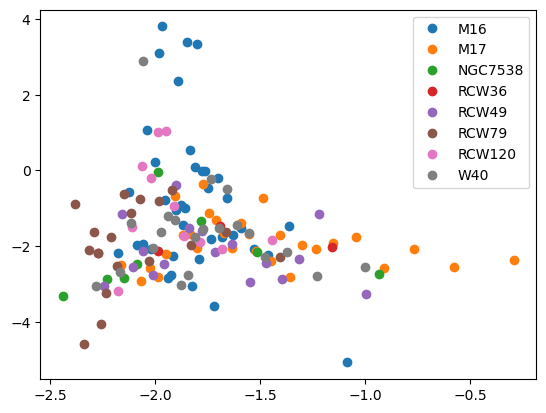

In [5]:
## plot the offset results
for pls, offs, av8s, region in zip(pl_vals, offset_vals, av8m_vals, list_regions):
    plt.plot(av8s, offs, "o", label = region)

plt.legend()
plt.show()